In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BankLoan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# Understanding Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [6]:
# Drop null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Loan_ID'],inplace=True)

In [9]:
df.drop(columns=['Loan_Amount_Term','Credit_History'],inplace=True)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,Urban


In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [14]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.Property_Area.unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

# EDA

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,289.0,4637.352941,4790.683934,0.0,2875.0,3833.0,5000.0,72529.0
CoapplicantIncome,289.0,1528.262976,2377.599209,0.0,0.0,879.0,2400.0,24000.0
LoanAmount,289.0,136.792388,59.699582,28.0,102.0,126.0,158.0,460.0


**Analysis** 
-  In ApplicantIncome column minimum value start with 0 which is not possible and maximum amount is much more than mean which means that it is skewed towrads rigth and outliers should be treated.
-  In CoapplicantIncome minimum value is 0 which again cannot be possible.Here 1st quantile has no value and values are skewed towards right.
-  In LoanAmount minimum value is 28 and maximum is 460 which has great difference and data is skewed towards rigth.
-  LoanAmountTerm and Credit History has no signifiacnt data.

In [18]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(include='number').columns.tolist()

In [19]:
print(cat_columns)
print(num_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


ApplicantIncome
Skewness: 10.41


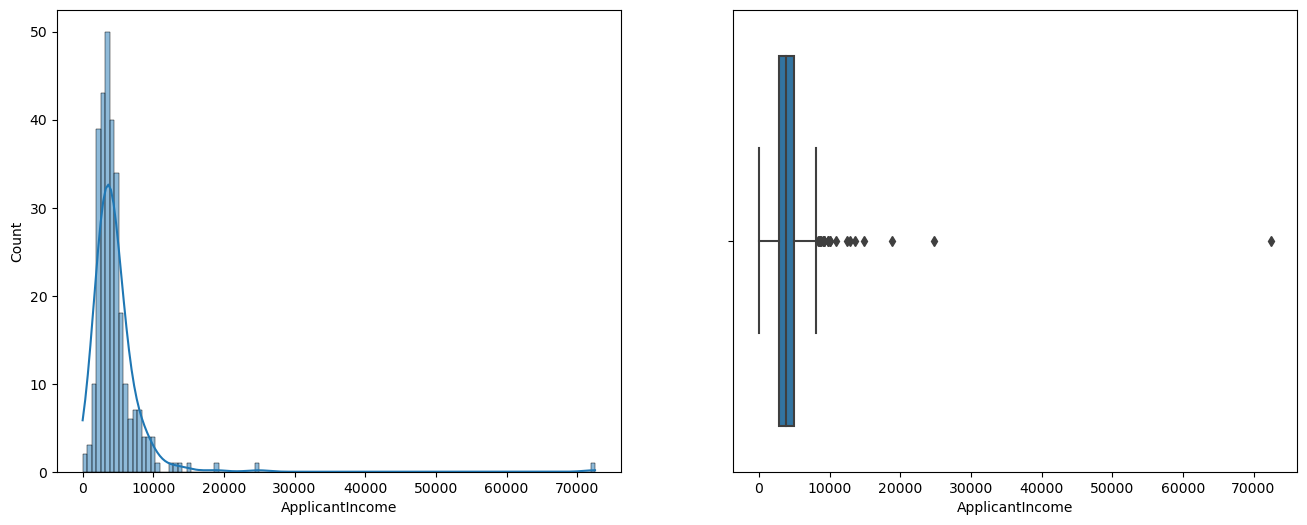

CoapplicantIncome
Skewness: 4.51


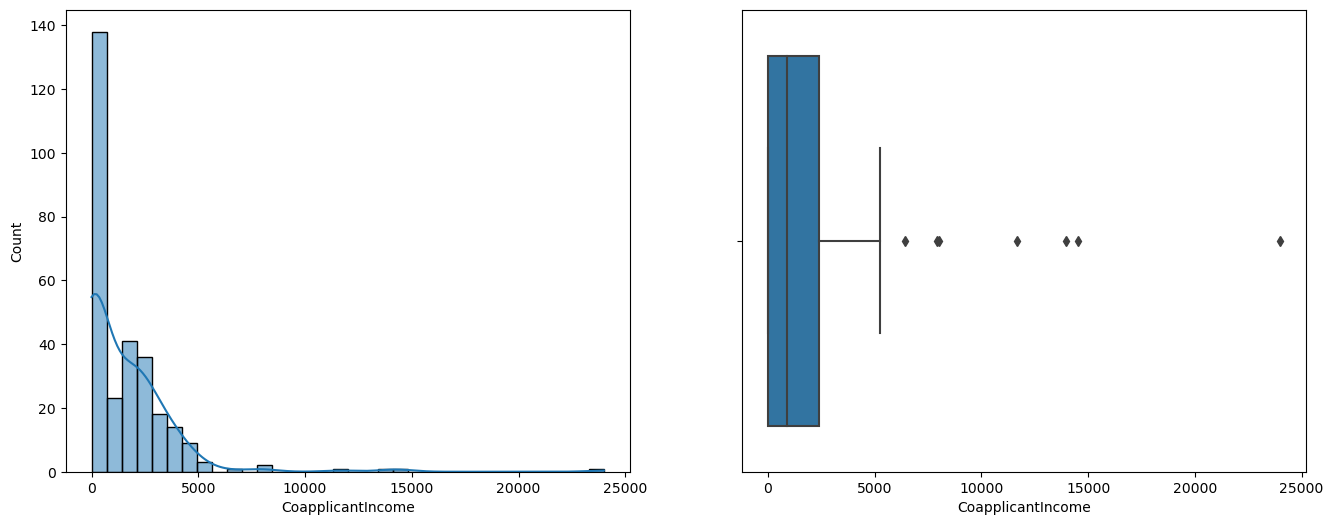

LoanAmount
Skewness: 1.78


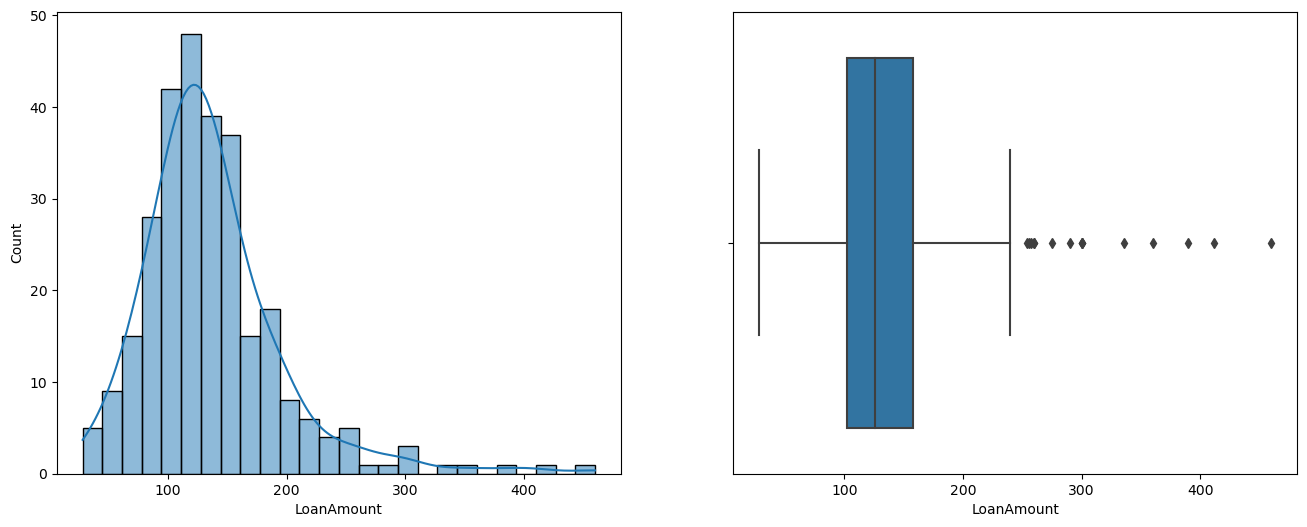

In [20]:
for col in num_columns:
    print(col)
    print("Skewness:",round(df[col].skew(),2))
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.histplot(df,x=df[col],kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [21]:
Q3= df[col].quantile(0.75)
Q1 = df[col].quantile(0.25)

In [22]:
print(Q3)
print(Q1)

158.0
102.0


In [23]:
for col in num_columns:
    Q3= df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR= Q3-Q1
    #print(IQR)
    lower_bound = df[col].quantile(0.25) - 1.5*IQR
    upper_bound = df[col].quantile(0.75)+ 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col]<=upper_bound)]

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,259.0,3857.494208,1476.928741,0.0,2781.0,3644.0,4704.5,8000.0
CoapplicantIncome,259.0,1289.965251,1403.129897,0.0,0.0,1000.0,2363.5,5272.0
LoanAmount,259.0,125.386100,39.738359,28.0,100.0,124.0,150.0,225.0


ApplicantIncome
Skewness: 0.68


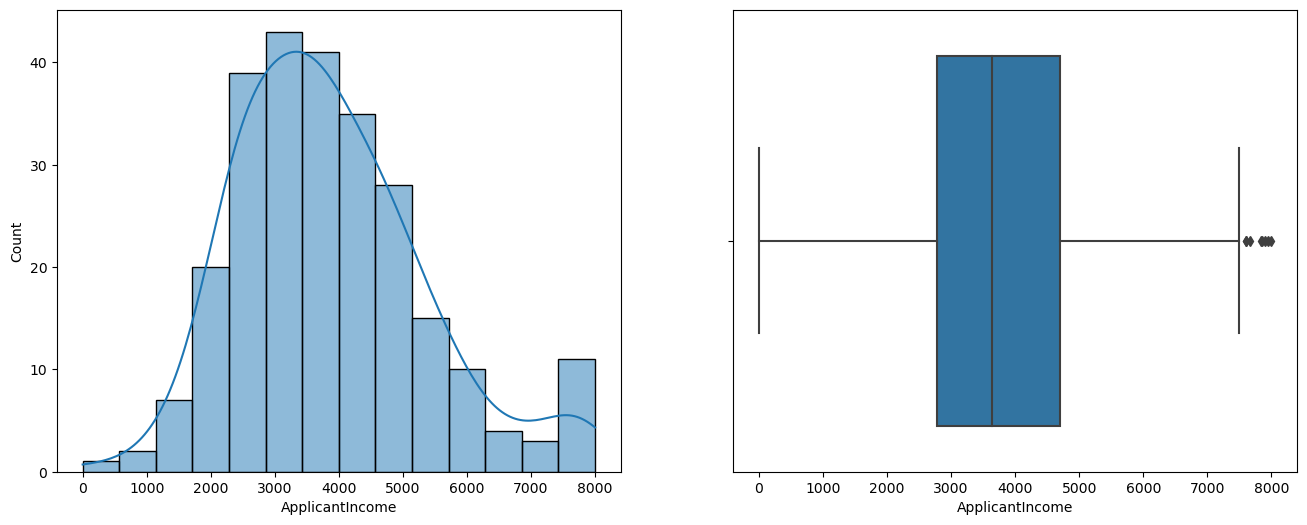

CoapplicantIncome
Skewness: 0.77


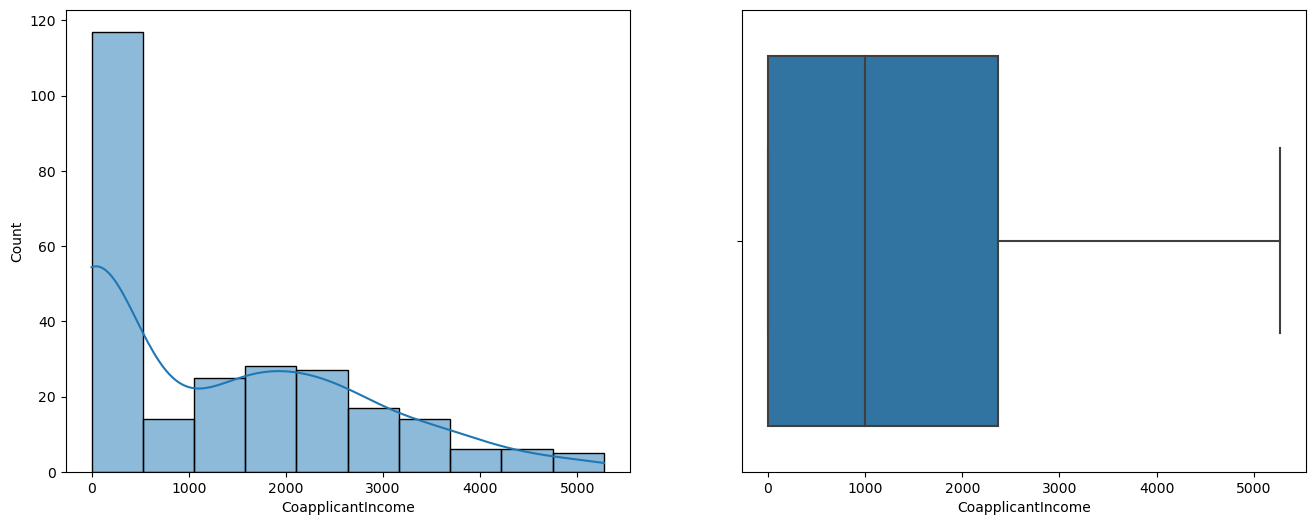

LoanAmount
Skewness: 0.07


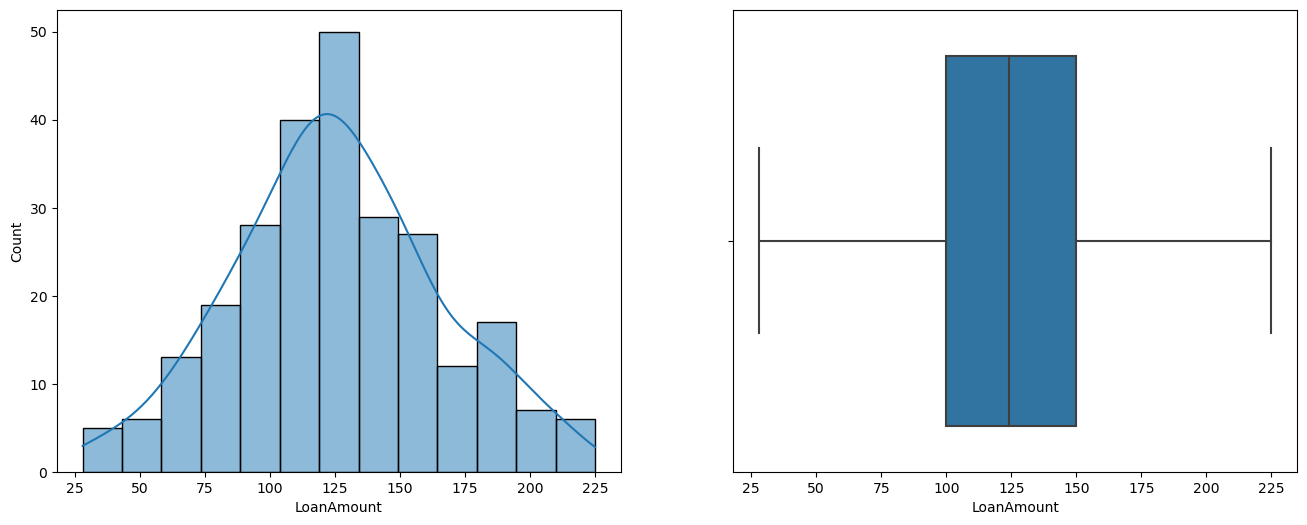

In [25]:
for col in num_columns:
    print(col)
    print("Skewness:",round(df[col].skew(),2))
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.histplot(df,x=df[col],kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, x=df[col])
    plt.show()

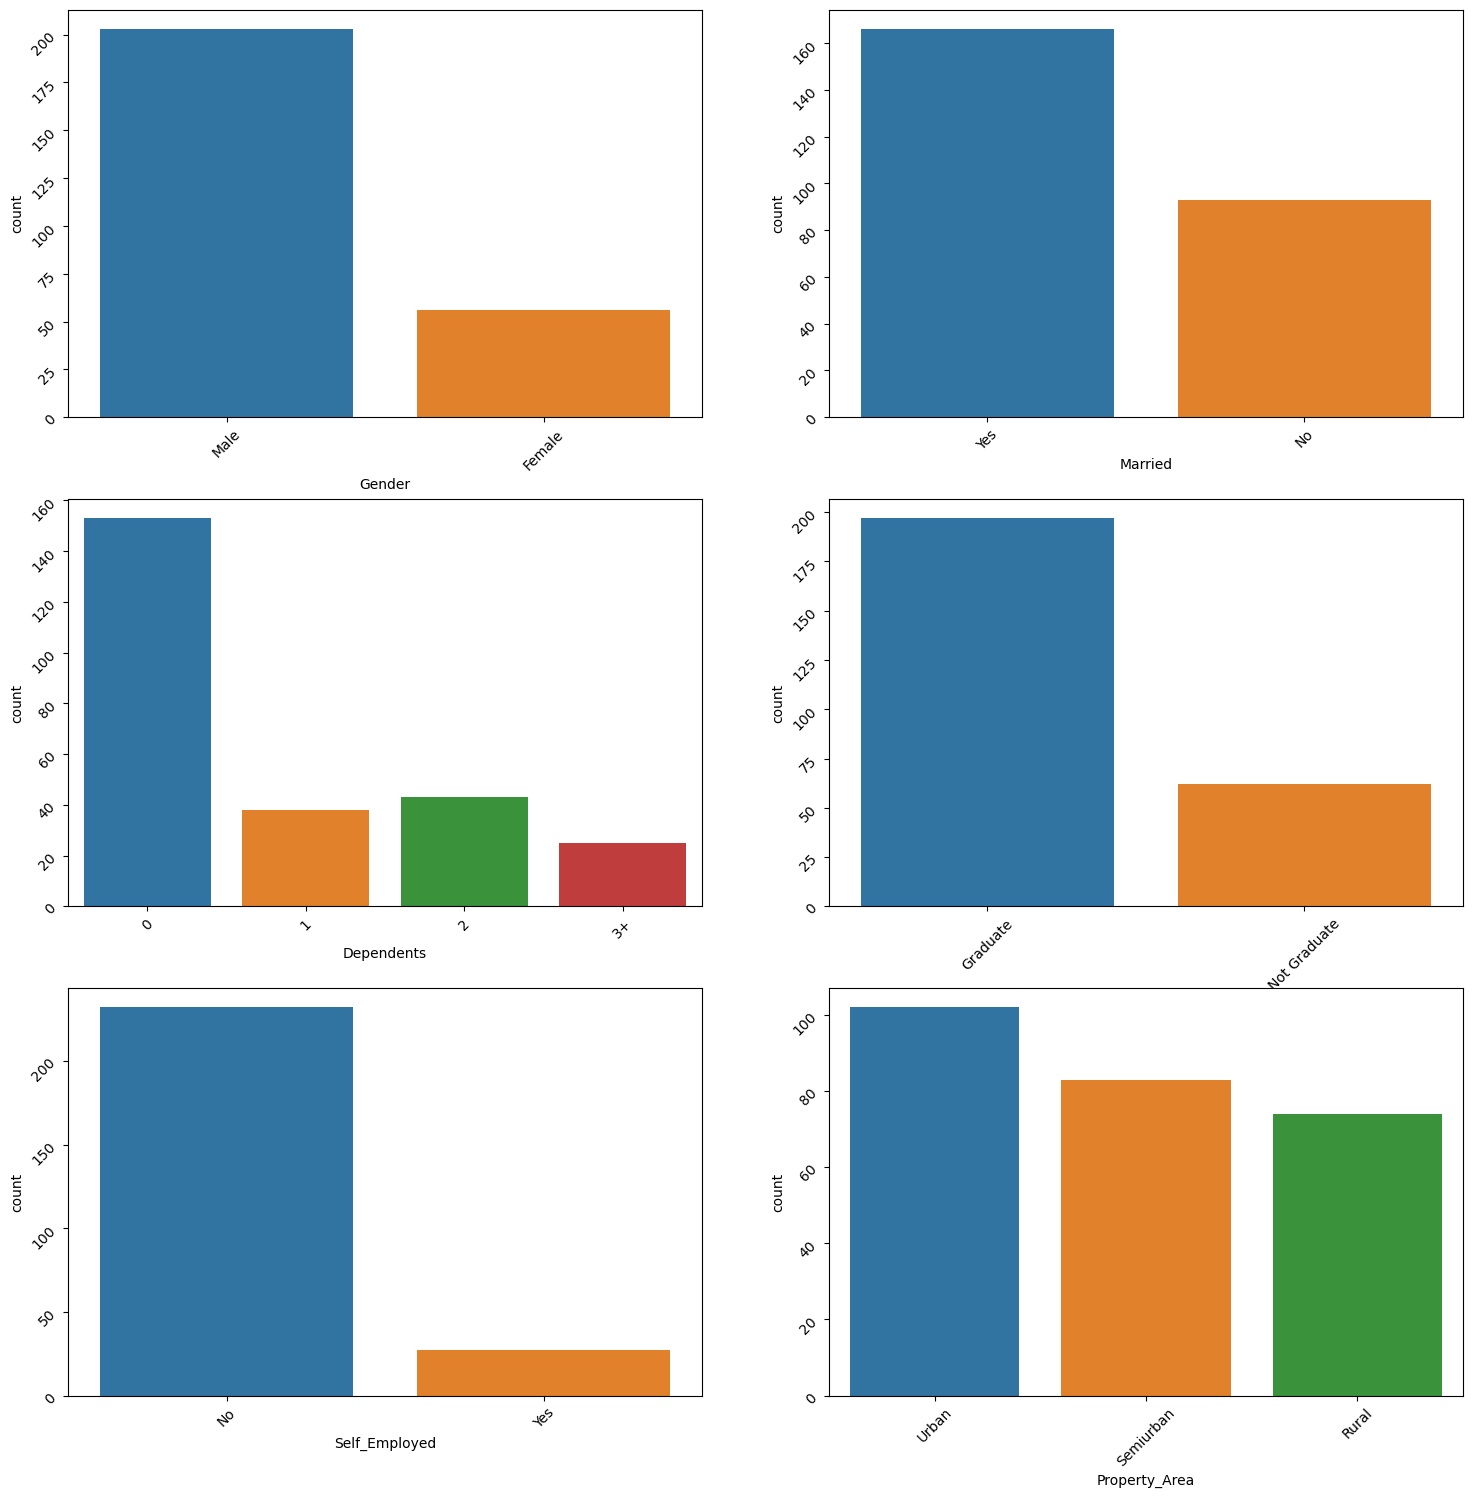

In [26]:
fig,axes=plt.subplots(3,2,figsize=(18,18))

for i,cols in enumerate(cat_columns):
    row,col_indx = divmod(i,2)
    axes[row,col_indx].tick_params(labelrotation=45)
    sns.countplot(ax=axes[row,col_indx],x=cols,data=df)

**Analysis**
-  Majority of afforted loan is for male applicant
-  Married once apply more for loan this can be for home loans.
-  Graduated people get more % if loan than ungraduacte.
-  Employees get more percenatge of loan than bussiness owers.
-  And Urban region needs more home loan.

<Figure size 1600x600 with 0 Axes>

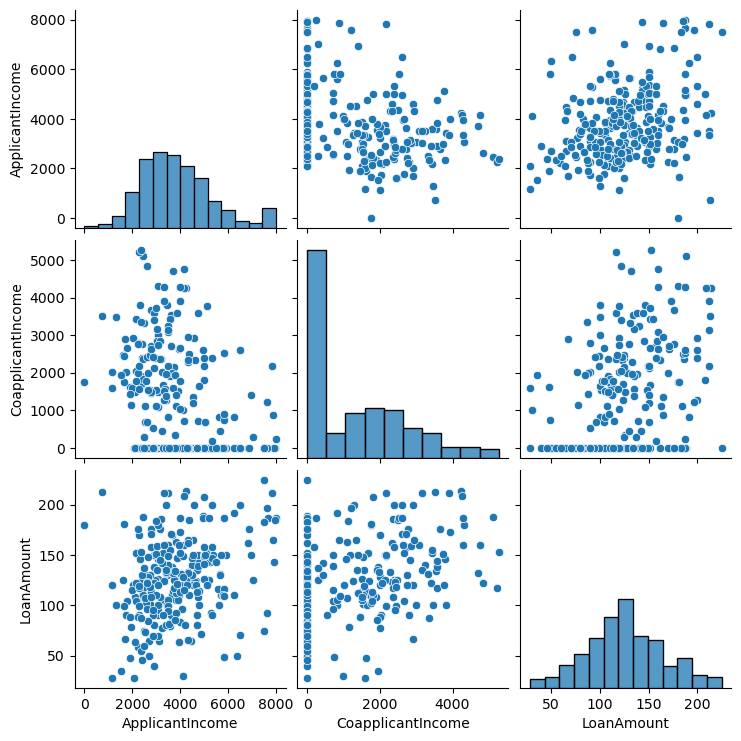

In [27]:
plt.figure(figsize=(16,6))
sns.pairplot(data=df)
plt.show()

In [28]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

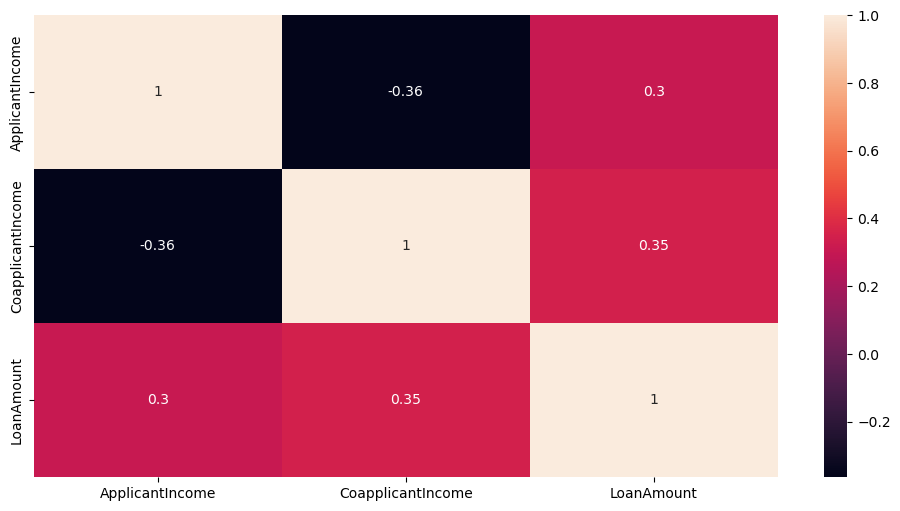

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True)
plt.show()